### 1) Информация о наборе данных о возрасте

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("AgeDataset-V1.csv")
sampled_df = df.sample(frac=0.4)
print(df.columns)
print(df)

Index(['Id', 'Name', 'Short description', 'Gender', 'Country', 'Occupation',
       'Birth year', 'Death year', 'Manner of death', 'Age of death'],
      dtype='object')
                Id                     Name  \
0              Q23        George Washington   
1              Q42            Douglas Adams   
2              Q91          Abraham Lincoln   
3             Q254  Wolfgang Amadeus Mozart   
4             Q255     Ludwig van Beethoven   
...            ...                      ...   
1223004  Q77247326    Marie-Fortunée Besson   
1223005  Q77249504              Ron Thorsen   
1223006  Q77249818       Diether Todenhagen   
1223007  Q77253909  Reginald Oswald Pearson   
1223008  Q77254864             Horst Lerche   

                                         Short description Gender  \
0           1st president of the United States (1732–1799)   Male   
1                              English writer and humorist   Male   
2          16th president of the United States (1809-1865)

## Столбцы на русском:
```Id``` - идентификатор - страна<br/>
```Name```- Полное имя<br/>
```Short description``` - Краткое описание <br/>
```Gender``` - пол<br/>
```Country``` - Страна / исторический регион<br/>
```Occupation``` - Название профессии<br/>
```Birth year``` - Год рождения<br/>
```Death year``` - Год смерти<br/>
```Manner of death``` - Способ смерти<br/>
```Age of death``` - Возраст смерти<br/>

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


Id                     Name  \
0   Q23        George Washington   
1   Q42            Douglas Adams   
2   Q91          Abraham Lincoln   
3  Q254  Wolfgang Amadeus Mozart   
4  Q255     Ludwig van Beethoven   

                                 Short description Gender  \
0   1st president of the United States (1732–1799)   Male   
1                      English writer and humorist   Male   
2  16th president of the United States (1809-1865)   Male   
3        Austrian composer of the Classical period   Male   
4           German classical and romantic composer   Male   

                                             Country  Occupation  Birth year  \
0  United States of America; Kingdom of Great Bri...  Politician        1732   
1                                     United Kingdom      Artist        1952   
2                           United States of America  Politician        1809   
3    Archduchy of Austria; Archbishopric of Salzburg      Artist        1756   
4                 Holy Roman Empire; Austrian Empire      Artist        1770   

   Death year Manner of death  Age of death  
0      1799.0  natural causes          67.0  
1      2001.0  natural causes          49.0  
2      1865.0        homicide          56.0  
3      1791.0             NaN          35.0  
4      1827.0             NaN          57.0

Объект наблюдения жизнь людей содержит такие данные как дата рождения, дата смерти причина смерти профессия и тп

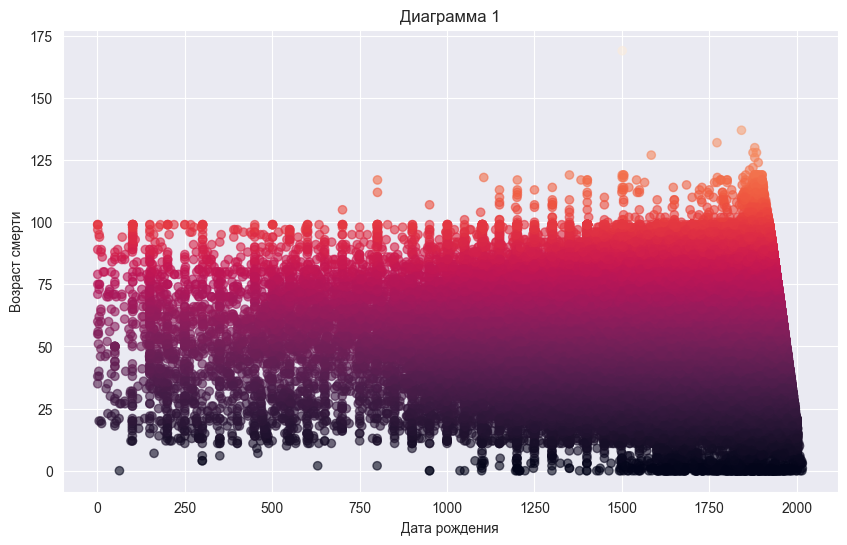

In [4]:
plt.figure(figsize=(10, 6))

df1 = df[df['Birth year'] >= 0]

plt.scatter(df1['Birth year'], df1['Age of death'], c=df1['Age of death'], alpha=0.6)

plt.title("Диаграмма 1")
plt.ylabel("Возраст смерти")
plt.xlabel("Дата рождения")
plt.grid(visible=True)

plt.show()

Анализируем датафрейм при помощи "ящика с усами". Есть смещение в сторону больших значений, это можно исправить при помощи oversampling и undersampling.

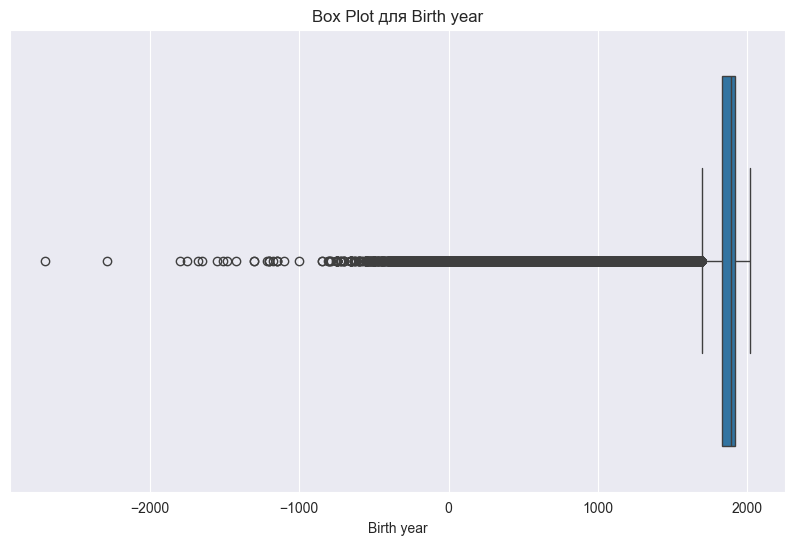

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Birth year'])
plt.title('Box Plot для Birth year')
plt.xlabel('Birth year')
plt.show()

Есть выбросы.

Выбросы:
                Id                   Name  \
8             Q297        Diego Velázquez   
9             Q301               El Greco   
11            Q307        Galileo Galilei   
13            Q346     Louis IX of France   
15            Q353     Blanche of Castile   
...            ...                    ...   
1222824  Q76625167    Francisco de Segura   
1222864  Q76737718             Hans Osara   
1222928  Q76879920       Luigi Anguissola   
1222934  Q76887267          Luigi Strozzi   
1223002  Q77233630  Matteo Gregorio Rossi   

                                         Short description  Gender  \
8                              Spanish painter (1599-1660)    Male   
9                    Greek painter, sculptor and architect    Male   
11       Italian mathematician, physicist, philosopher ...    Male   
13                                          king of France    Male   
15       Spanish princess and saint, queen consort of F...  Female   
...                           

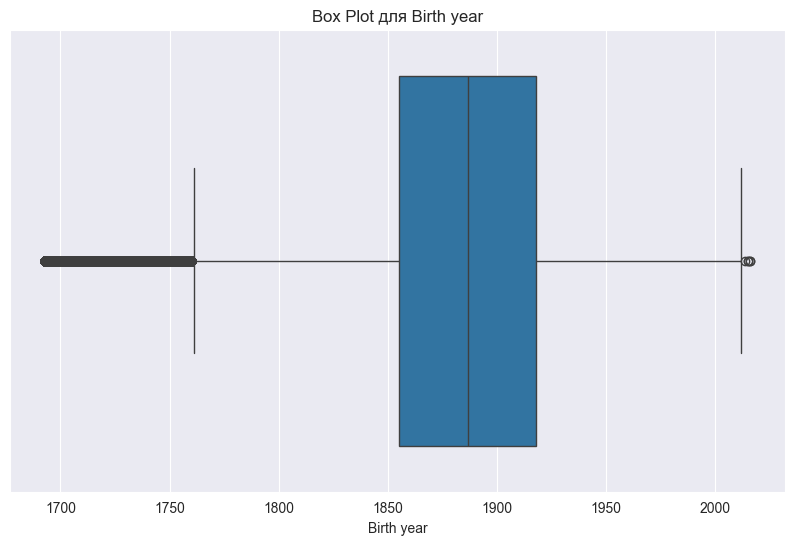

In [6]:
# Статистический анализ для определения выбросов
df = df[df['Birth year'] > 0]

Q1 = df['Birth year'].quantile(0.25)
Q3 = df['Birth year'].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df['Birth year'] < (Q1 - threshold)) | (df['Birth year'] > (Q3 + threshold))

# Вывод выбросов
print("Выбросы:")
print(df[outliers])

# Обработка выбросов
# В данном случае мы заменим выбросы на медианное значение
median_review_no = df['Birth year'].median()
df.loc[outliers, 'Birth year'] = median_review_no

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Birth year'])
plt.title('Box Plot для Birth year')
plt.xlabel('Birth year')
plt.show()

In [7]:
import pandas as pd

# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Id                         0
Name                       0
Short description      67877
Gender                133600
Country               335192
Occupation            206844
Birth year                 0
Death year                 1
Manner of death      1168920
Age of death               1
dtype: int64

Id                   False
Name                 False
Short description     True
Gender                True
Country               True
Occupation            True
Birth year           False
Death year            True
Manner of death       True
Age of death          True
dtype: bool

Short description процент пустых значений: %5.55
Gender процент пустых значений: %10.93
Country процент пустых значений: %27.42
Occupation процент пустых значений: %16.92
Death year процент пустых значений: %0.00
Manner of death процент пустых значений: %95.62
Age of death процент пустых значений: %0.00


In [8]:

# Замена пустых данных на медиану
df["Birth year"] = df["Birth year"].fillna(df["Birth year"].median())
df["Death year"] = df["Death year"].fillna(df["Death year"].max())
df["Age of death"] = df["Age of death"].fillna(df["Death year"] - df["Birth year"] + 1)

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Short description процент пустых значений: %5.55
Gender процент пустых значений: %10.93
Country процент пустых значений: %27.42
Occupation процент пустых значений: %16.92
Manner of death процент пустых значений: %95.62


Manner of death имеет слишком много пустых значений </br> Age of death считается из других полей <br> в выборке их лучше исключить

In [9]:
# Функция для создания выборок
from sklearn.model_selection import train_test_split
dropna_df = df.dropna()
df_input = dropna_df[["Id", "Gender", "Country", "Birth year", "Death year"]].query('Gender == "Male" or Gender == "Female"')
#[["Gender"] == "Male" or ["Gender"] == "Female"]

train_df, temp_df = train_test_split(df_input, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Сохранение выборок в файлы
train_df.to_csv(".//static//csv//train_data.csv", index=False)
val_df.to_csv(".//static//csv//val_data.csv", index=False)
test_df.to_csv(".//static//csv//test_data.csv", index=False)

Размер обучающей выборки: 27438
Размер контрольной выборки: 9146
Размер тестовой выборки: 9146


In [10]:
train_df = pd.read_csv(".//static//csv//train_data.csv")
val_df = pd.read_csv(".//static//csv//val_data.csv")
test_df = pd.read_csv(".//static//csv//test_data.csv")

# Оценка сбалансированности
def check_balance(df, name):
    counts = df['Gender'].value_counts()
    print(f"Распределение Gender в {name}:")
    print(counts)
    print(f"Процент Male: {counts['Male'] / len(df) * 100:.2f}%")
    print(f"Процент Female: {counts['Female'] / len(df) * 100:.2f}%")
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение Gender в обучающей выборке:
Gender
Male      22999
Female     4439
Name: count, dtype: int64
Процент Male: 83.82%
Процент Female: 16.18%

Распределение Gender в контрольной выборке:
Gender
Male      7721
Female    1425
Name: count, dtype: int64
Процент Male: 84.42%
Процент Female: 15.58%

Распределение Gender в тестовой выборке:
Gender
Male      7707
Female    1439
Name: count, dtype: int64
Процент Male: 84.27%
Процент Female: 15.73%



Данные не сбалансированы: мужчин больше, чем женщин.

In [11]:
from sklearn.utils import resample

standard_data = df_input[df_input['Gender'] == 'Male']
free_data = df_input[df_input['Gender'] == 'Female']

# Уменьшение количества male до количества female
standard_undersampled = resample(standard_data,
                                 replace=False,  # выборка без замены
                                 n_samples=len(free_data),  # количество образцов для выборки
                                 random_state=42)  # для воспроизводимости

# Объединение данных обратно
df_input = pd.concat([standard_undersampled, free_data])

train_df, temp_df = train_test_split(df_input, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение Gender в обучающей выборке:
Gender
Male      4419
Female    4344
Name: count, dtype: int64
Процент Male: 50.43%
Процент Female: 49.57%

Распределение Gender в контрольной выборке:
Gender
Female    1487
Male      1434
Name: count, dtype: int64
Процент Male: 49.09%
Процент Female: 50.91%

Распределение Gender в тестовой выборке:
Gender
Female    1472
Male      1450
Name: count, dtype: int64
Процент Male: 49.62%
Процент Female: 50.38%



### 2) Образование студентов

In [12]:
df = pd.read_csv("StudentsPerformance.csv")
sampled_df = df.sample(frac=0.4)
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [13]:
df.info()
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
(1000, 8)


gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [14]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool



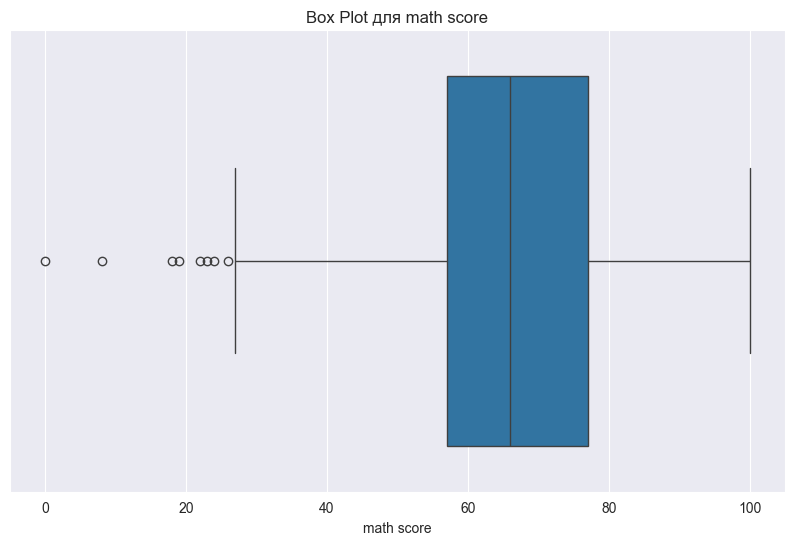

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['math score'])
plt.title('Box Plot для math score')
plt.xlabel('math score')
plt.show()

Есть выбросы

Выбросы:
     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                    none          24             38

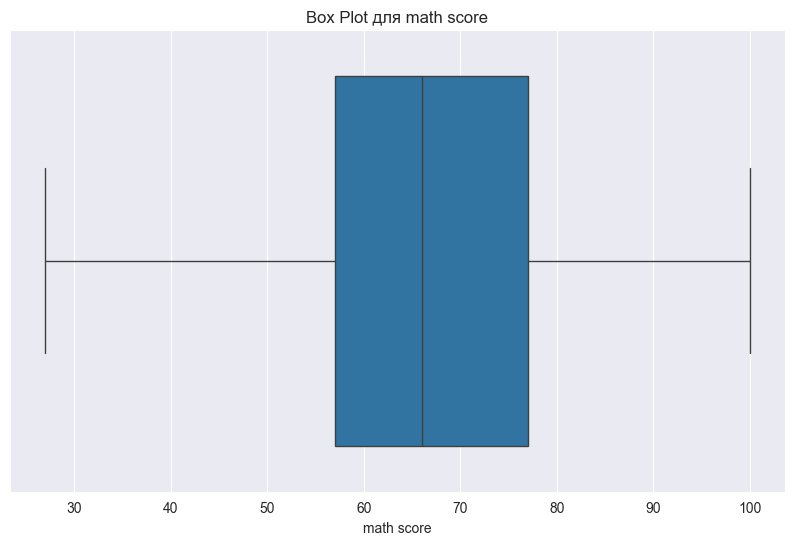

In [16]:
# Статистический анализ для определения выбросов
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df['math score'] < (Q1 - threshold)) | (df['math score'] > (Q3 + threshold))

# Вывод выбросов
print("Выбросы:")
print(df[outliers])

# Обработка выбросов
# В данном случае мы заменим выбросы на медианное значение
median_review_no = df['math score'].median()
df.loc[outliers, 'math score'] = median_review_no

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['math score'])
plt.title('Box Plot для math score')
plt.xlabel('math score')
plt.show()

In [17]:
# Функция для создания выборок
from sklearn.model_selection import train_test_split
dropna_df = df.dropna()
df_input = dropna_df[["math score", "reading score", "writing score", "lunch"]]

train_df, temp_df = train_test_split(df_input, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Сохранение выборок в файлы
train_df.to_csv(".//static//csv//train_data.csv", index=False)
val_df.to_csv(".//static//csv//val_data.csv", index=False)
test_df.to_csv(".//static//csv//test_data.csv", index=False)

Размер обучающей выборки: 600
Размер контрольной выборки: 200
Размер тестовой выборки: 200


In [18]:
train_df = pd.read_csv(".//static//csv//train_data.csv")
val_df = pd.read_csv(".//static//csv//val_data.csv")
test_df = pd.read_csv(".//static//csv//test_data.csv")

def check_balance(df, name):
    counts = df['lunch'].value_counts()
    print(f"Распределение lunch в {name}:")
    print(counts)
    print(f"Процент standard: {counts['standard'] / len(df) * 100:.2f}%")
    print(f"Процент free/reduced: {counts['free/reduced'] / len(df) * 100:.2f}%")
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение lunch в обучающей выборке:
lunch
standard        394
free/reduced    206
Name: count, dtype: int64
Процент standard: 65.67%
Процент free/reduced: 34.33%

Распределение lunch в контрольной выборке:
lunch
standard        134
free/reduced     66
Name: count, dtype: int64
Процент standard: 67.00%
Процент free/reduced: 33.00%

Распределение lunch в тестовой выборке:
lunch
standard        117
free/reduced     83
Name: count, dtype: int64
Процент standard: 58.50%
Процент free/reduced: 41.50%



In [19]:
standard_data = df_input[df_input['lunch'] == 'standard']
free_data = df_input[df_input['lunch'] == 'free/reduced']

# Уменьшение количества male до количества female
standard_undersampled = resample(standard_data,
                                 replace=False,  # выборка без замены
                                 n_samples=len(free_data),  # количество образцов для выборки
                                 random_state=42)  # для воспроизводимости

# Объединение данных обратно
df_input = pd.concat([standard_undersampled, free_data])

train_df, temp_df = train_test_split(df_input, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

train_df.to_csv(".//static//csv//train_data.csv", index=False)
val_df.to_csv(".//static//csv//val_data.csv", index=False)
test_df.to_csv(".//static//csv//test_data.csv", index=False)

Распределение lunch в обучающей выборке:
lunch
free/reduced    230
standard        196
Name: count, dtype: int64
Процент standard: 46.01%
Процент free/reduced: 53.99%

Распределение lunch в контрольной выборке:
lunch
standard        75
free/reduced    67
Name: count, dtype: int64
Процент standard: 52.82%
Процент free/reduced: 47.18%

Распределение lunch в тестовой выборке:
lunch
standard        84
free/reduced    58
Name: count, dtype: int64
Процент standard: 59.15%
Процент free/reduced: 40.85%



3) Зарплаты 

In [20]:
df = pd.read_csv("ds_salaries.csv")
sampled_df = df.sample(frac=0.4)
print(df.columns)
print(df)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scie

In [21]:
df.info()
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
(3755, 11)


work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [22]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool



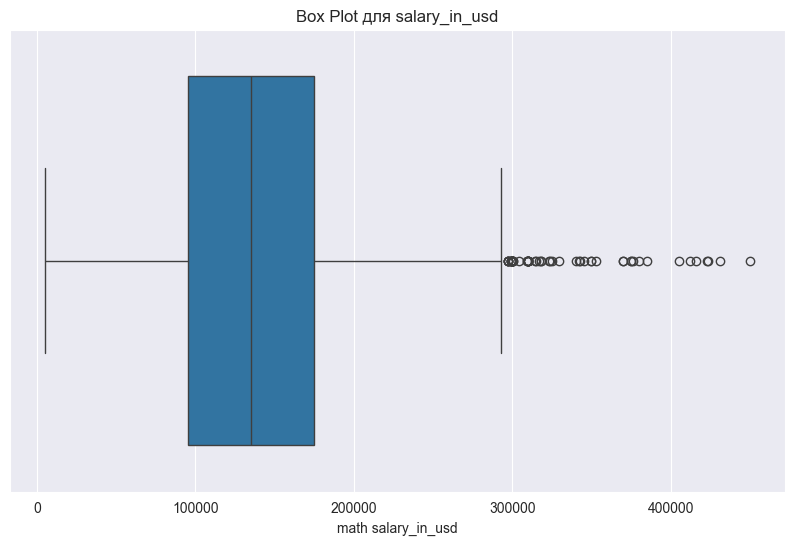

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Box Plot для salary_in_usd')
plt.xlabel('math salary_in_usd')
plt.show()

Есть выбросы

Выбросы:
      work_year experience_level employment_type  \
33         2023               SE              FT   
68         2023               SE              FT   
83         2022               EN              FT   
133        2023               SE              FT   
145        2023               SE              FT   
...         ...              ...             ...   
3522       2020               MI              FT   
3675       2021               EX              CT   
3697       2020               EX              FT   
3747       2021               MI              FT   
3750       2020               SE              FT   

                               job_title  salary salary_currency  \
33              Computer Vision Engineer  342810             USD   
68                     Applied Scientist  309400             USD   
83                          AI Developer  300000             USD   
133            Machine Learning Engineer  342300             USD   
145            Machine Lea

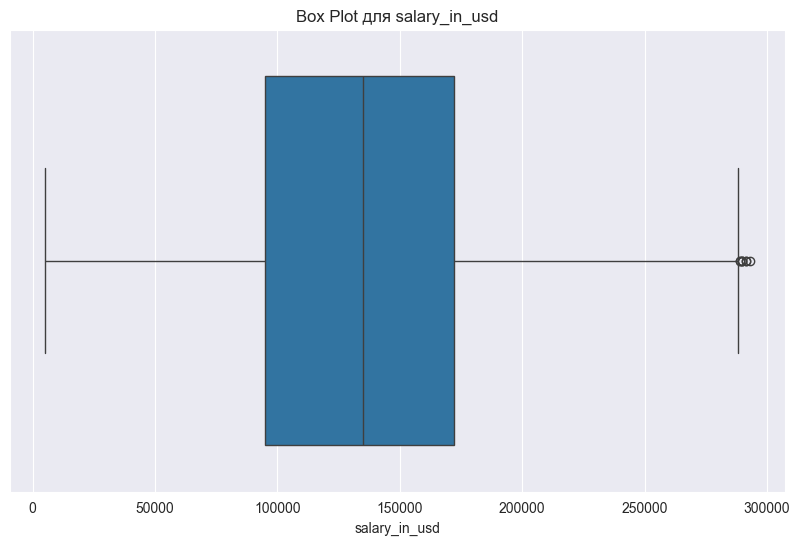

In [24]:
# Статистический анализ для определения выбросов
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df['salary_in_usd'] < (Q1 - threshold)) | (df['salary_in_usd'] > (Q3 + threshold))

# Вывод выбросов
print("Выбросы:")
print(df[outliers])

# Обработка выбросов
# В данном случае мы заменим выбросы на медианное значение
median_review_no = df['salary_in_usd'].median()
df.loc[outliers, 'salary_in_usd'] = median_review_no

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Box Plot для salary_in_usd')
plt.xlabel('salary_in_usd')
plt.show()

In [25]:
# Функция для создания выборок
from sklearn.model_selection import train_test_split
dropna_df = df.dropna()
df_input = dropna_df[["salary_in_usd", "employee_residence", "company_size", "work_year", "company_location"]]

train_df, temp_df = train_test_split(df_input, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Сохранение выборок в файлы
train_df.to_csv(".//static//csv//train_data.csv", index=False)
val_df.to_csv(".//static//csv//val_data.csv", index=False)
test_df.to_csv(".//static//csv//test_data.csv", index=False)

Размер обучающей выборки: 2253
Размер контрольной выборки: 751
Размер тестовой выборки: 751


In [27]:
train_df = pd.read_csv(".//static//csv//train_data.csv")
val_df = pd.read_csv(".//static//csv//val_data.csv")
test_df = pd.read_csv(".//static//csv//test_data.csv")

def check_balance(df, name):
    counts = df['company_size'].value_counts()
    print(f"Распределение company_size в {name}:")
    print(counts)
    print(f"Процент L: {counts['L'] / len(df) * 100:.2f}%")
    print(f"Процент M: {counts['M'] / len(df) * 100:.2f}%")
    print(f"Процент S: {counts['S'] / len(df) * 100:.2f}%")
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение company_size в обучающей выборке:
company_size
M    1893
L     276
S      84
Name: count, dtype: int64
Процент L: 12.25%
Процент M: 84.02%
Процент S: 3.73%

Распределение company_size в контрольной выборке:
company_size
M    622
L     97
S     32
Name: count, dtype: int64
Процент L: 12.92%
Процент M: 82.82%
Процент S: 4.26%

Распределение company_size в тестовой выборке:
company_size
M    638
L     81
S     32
Name: count, dtype: int64
Процент L: 10.79%
Процент M: 84.95%
Процент S: 4.26%



Данные не сбалансированы